# Regression using gradient descent

In this lab, you will implement linear regression with one variable to predict profits for a restaurant franchise.



<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [185]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [186]:
# load the dataset
# Data is in txt format placed inside data directory
#you can call the load_dat function from utils.py file

#________Your Code Here________ 
import numpy as np


# def load_data():
#     data = np.loadtxt("ex1data1.txt", delimiter=',')
#     X = data[:,0]
#     y = data[:,1]
#     return X, y

def load_data():
    data = np.loadtxt("ex1data2.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

x_train, y_train = load_data()


#### View the variables
Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the variable `x_train` and the type of the variable.

In [187]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  
Now, let's print `y_train`

In [188]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [399900. 329900. 369000. 232000. 539900.]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [189]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (47, 2)
The shape of y_train is:  (47,)
Number of training examples (m): 47


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


In [210]:
# # Create a scatter plot of the data. To change the markers to red "x",
# # we used the 'marker' and 'c' parameters



# plt.scatter(x_train[:,0],y_train, marker='x', c='r') 

# # Set the title
# plt.title("Profits vs. Population per city")
# # Set the y-axis label
# plt.ylabel('Profit in $10,000')
# # Set the x-axis label
# plt.xlabel('Population of City in 10,000s')
# plt.show()

Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

<a name="4"></a>
## 4 - Refresher on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [193]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
    
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x_train.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    #_________DONT USE FOR LOOPS HERE USE VACTORIZATION INSTEAD ______ 
    
    # 𝑓𝑤𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏
    
    ### START CODE HERE ###
    predicted_y = (w *  x_train) + b
#     print(predicted_y)

#     from sklearn.metrics import mean_squared_error
#     total_cost = mean_squared_error(y_train, predicted_y)
#     total_cost =  (1/(2*(m)) * (((y_train - predicted_y)**2).sum()))
    
    
    mse1 = np.mean((predicted_y[:,0] - y_train)**2)
    mse2 = np.mean((predicted_y[:,1] - y_train)**2)
    cost = (mse1 + mse2) / 2
    return cost
    
    ### END CODE HERE ### 

    return total_cost

You can check if your implementation was correct by running the following test code:

In [194]:
# Compute cost with some initial values for paramaters w, b
initial_w = [3,2]
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w,  initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# # Public tests
# from public_tests import *
# compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 128908347071.149


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w:<b> 75.203 </td> 
  </tr>
</table>

<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [195]:
# # UNQ_C2
# # GRADED FUNCTION: compute_gradient
# def compute_gradient(x, y, w,  b): 
#     """
#     Computes the gradient for linear regression 
#     Args:
#       x (ndarray): Shape (m,) Input to the model (Population of cities) 
#       y (ndarray): Shape (m,) Label (Actual profits for the cities)
#       w, b (scalar): Parameters of the model  
#     Returns
#       dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
#       dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
#      """
#     predicted_y = (w * x_train) + b

    
#     # Number of training examples
#     m = x.shape[0]
    
#     # You need to return the following variables correctly
#     dj_dw1 = 0
#     dj_db2 = 0
#     dj_db = 0
    
    
#     dj_dw11 =0
#     dj_dw21 =0 
#     dj_db1 = 0
    
#     ### START CODE HERE ###
    
#     dj_db1 = (predicted_y - y_train)
#     dj_dw11 = (predicted_y - y_train) * x_train
#     dj_dw21 = (predicted_y - y_train) * (x_train**2)
    
    
#     dj_db = (1/(m) * (dj_db1.sum()))
#     dj_dw1 = (1/(m) * (dj_dw11.sum()))
#     dj_dw2 = (1/(m) * (dj_dw21.sum()))
    
    
#     ### END CODE HERE ### 
        
#     return dj_dw1, dj_dw2, dj_db

In [196]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (ndarray): Parameters of the model  
    Returns
      dj_dw (ndarray): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    predicted_y = (x @ w) + b

    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = np.zeros_like(w)
    dj_db = 0
    
    # Compute the gradients
    dj_db = (1/m) * np.sum(predicted_y - y)
    dj_dw = (1/m) * (x.T @ (predicted_y - y))

    return dj_dw, dj_db


Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [197]:
# Compute and display gradient with w initialized to zeroes
initial_w = [0,0]
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

# compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): [-7.64209128e+08 -1.12036770e+06] -340412.6595744681


Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [198]:
# Compute and display cost and gradient with non-zero w

test_w = [0,0]
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)



Gradient at test w, b: [-7.64208728e+08 -1.12036707e+06] -340412.4595744682


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

In [199]:
print(tmp_dj_dw)

[-7.64208728e+08 -1.12036707e+06]


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

### Exercise 3 

    Update the values of w and b
    

Iteration    0: Cost 13272661009734192.00   
Iteration  150: Cost      nan   
Iteration  300: Cost      nan   
Iteration  450: Cost      nan   
Iteration  600: Cost      nan   
Iteration  750: Cost      nan   
Iteration  900: Cost      nan   
Iteration 1050: Cost      nan   
Iteration 1200: Cost      nan   

C:\Users\HP\AppData\Local\Temp/ipykernel_10352/1346521763.py:34: RuntimeWarning: overflow encountered in square
  mse1 = np.mean((predicted_y[:,0] - y_train)**2)
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/1346521763.py:35: RuntimeWarning: overflow encountered in square
  mse2 = np.mean((predicted_y[:,1] - y_train)**2)
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/2284659859.py:23: RuntimeWarning: overflow encountered in matmul
  dj_dw = (1/m) * (x.T @ (predicted_y - y))
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/2284659859.py:23: RuntimeWarning: invalid value encountered in matmul
  dj_dw = (1/m) * (x.T @ (predicted_y - y))
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/2857480711.py:39: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * (dj_dw)



Iteration 1350: Cost      nan   
w,b found by gradient descent: [nan nan] nan


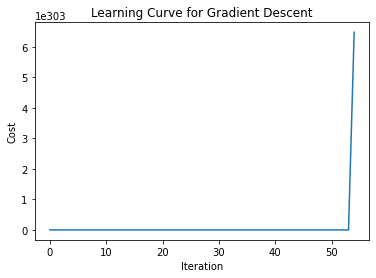

In [200]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        #_________your code here_________
        ### START CODE HERE ###
        
        w = w - alpha * (dj_dw)
        b = b - alpha * (dj_db)
        
        ### END CODE HERE ###
                   

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

            
#         print("Cost: " + str(cost))
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing



# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = [1,1]
initial_b = 1

# some gradient descent settings
iterations = 1500

alpha = 0.0001

w,b,J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

#To get the basic idea of how the cost function varies with the parameters,
# Plot the learning curve
plt.plot(range(iterations), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning Curve for Gradient Descent')
plt.show()

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

Iteration    0: Cost 13272661009734192.00   
Iteration  150: Cost      nan   
Iteration  300: Cost      nan   
Iteration  450: Cost      nan   
Iteration  600: Cost      nan   
Iteration  750: Cost      nan   
Iteration  900: Cost      nan   


C:\Users\HP\AppData\Local\Temp/ipykernel_10352/1346521763.py:34: RuntimeWarning: overflow encountered in square
  mse1 = np.mean((predicted_y[:,0] - y_train)**2)
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/1346521763.py:35: RuntimeWarning: overflow encountered in square
  mse2 = np.mean((predicted_y[:,1] - y_train)**2)
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/2284659859.py:23: RuntimeWarning: overflow encountered in matmul
  dj_dw = (1/m) * (x.T @ (predicted_y - y))
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/2284659859.py:23: RuntimeWarning: invalid value encountered in matmul
  dj_dw = (1/m) * (x.T @ (predicted_y - y))
C:\Users\HP\AppData\Local\Temp/ipykernel_10352/2857480711.py:39: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * (dj_dw)


Iteration 1050: Cost      nan   
Iteration 1200: Cost      nan   
Iteration 1350: Cost      nan   
w,b found by gradient descent: [nan nan] nan


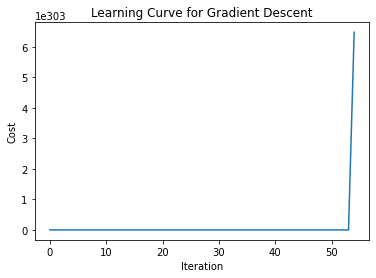

In [201]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = [1,1]
initial_b = 1

# some gradient descent settings
iterations = 1500

alpha = 0.0001

w,b,J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

#To get the basic idea of how the cost function varies with the parameters,
# Plot the learning curve
plt.plot(range(iterations), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning Curve for Gradient Descent')
plt.show()

**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

The warning "overflow encountered in square" suggests that some values in your computation are too large to be represented by the data type you are using, leading to an overflow error. This can cause the cost function to return NaN, which in turn can lead to NaN values for the model parameters.

One way to address this issue is to scale your input data so that it has a mean of zero and a standard deviation of one. This can help prevent overflow errors and also make your optimization process more efficient.

Additionally, you may want to try reducing the learning rate alpha to see if that helps stabilize the optimization process. A large learning rate can cause the optimization process to overshoot the minimum and diverge, leading to NaN values for the model parameters.

You may also want to try using a different optimization algorithm, such as Adam or RMSprop, which can sometimes be more effective than plain gradient descent for deep learning problems.

### Exercise 4

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [205]:
m = x_train.shape[0]
predicted = np.zeros(m)

#guessing the parameters for the best fit line.
w = [159.,400.]
b = 600.
# print(x,b)
#use vectorization to compute predicted values
#_________your code here_________
### START CODE HERE ###

predicted = w*x_train + b
# print(w, b)

### END CODE HERE ###


We will now plot the predicted values to see the linear fit.

In [209]:
# # Plot the linear fit
# # plt.plot(x_train, predicted, c = "b")

# # Create a scatter plot of the data. 
# # plt.scatter( x_train[:,0], y_train, marker='x', c='r') 

# # Set the title
# plt.title("Profits vs. Population per city")
# # Set the y-axis label
# plt.ylabel('Profit in $10,000')
# # Set the x-axis label
# plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [204]:
# w = [159.,400.]
# b = 600.
# predict1 = 3.5 * w + b
# print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

# predict2 = 7.0 * w + b
# print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))


# import numpy as np

w = np.array([159., 400.])
b = 600.
predict1 = np.dot(w, [0.3031, 1]) + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))


predict2 = np.dot(w, [7.0, 1]) + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))


For population = 35,000, we predict a profit of $10481929.00
For population = 70,000, we predict a profit of $21130000.00


**Expected Output**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>

You are requierd to answer these questions on your own after completing this assignmnet 

**Q1 : What was learning rate of our gradient descent algo and what will happen if make it too small and too large?**
<br>
The learning rate of our gradirnt descent algo is alpha (equals to 0.01), which is actually a hyperparameter that is controlling the step size at each iteration while moving towards a minimum of a loss function. If we make it too large it must bring out bad results with loss funtcion leading to big strides and may be missing many points/extermas. While a small learning rate will bring out good results as it is slowily converging.It is always suggested to keep the value of learnig rate between 0 an 1.


**Q2 : What you understand from the learning curve what will be the effect of Alpha on our curve?**
<br>
The learning curve in our algorithm is depicting that how much our algotihtm is working, is it improving with the more and more trainings like the cost from the learning curve must have to go down if we asssume it working good. It typically plots the training error and validation error as a function of the number of training examples. Alpha is playing a vital role in giving our perfect parameters thorugh iterations.


**Q3 : Explain gradient descent acording to your understanding in your own words**
<br>
Gradient Descent is an optimization machine learning algorithm. It optimizes the model by minimizing the cost. The results of gradient sescrnt gives us those parametrs at the end that have mininmum cost and best fits with the model. The algo suggests that: 
<br><center>
**𝑏:=𝑏−𝛼∂𝐽(𝑤,𝑏)∂𝑏** <center><br> 
Where the alpha is learning rate that specifically indicates that the length of each stride. Alpha is playing a vital role in giving our perfect parameters thorugh iterations. By iteratively adjusting the parameters towards the minimum of the cost function, gradient descent can be used to optimize a wide variety of models and functions, from simple linear regression to complex deep neural networks.

**Congratulations on completing this lab on linear regression!**


#### ©️ Andrew ng
